# **Análisis de datos - Trabajo práctico integrador**

## **Estadísticas Climatológicas Normales - Período 1991-2020**

Estudio sobre valores promedios de paramétros de estaciones climatológicas de todo el país medidos entre los años 1991 y 2020 (treinta años)

# 1) Exploración y comprensión de los datos

Lo primero que hacemos es importar las librerias que utiliaremos. A contínuación se carga el dataset proporcionado. 
Se eliminan las primeras 7 filas del dataset dado que contiene texto explicativo.
A continuación se elimina la columna "Unname: 14" que contiene datos erróneos/no significativos.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import re
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

### **a) Carga del dataset**

In [8]:
df30 = pd.read_csv("Estadisticas_normales_Datos_abiertos_1991-2020.txt", skiprows=7,sep="\t",encoding="latin1") #skiprows=7 elimina las primeras siete líneas (contienen texto)
df30

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Unnamed: 14
0,LA QUIACA OBSERVATORIO,Temperatura (°C),13.2,13.0,12.8,11.3,7.3,4.8,4.5,7.0,10.0,12.4,13.4,13.9,NaN
1,LA QUIACA OBSERVATORIO,Temperatura máxima (°C),20.6,20.4,20.6,20.3,17.8,16.3,16.1,18.0,20.0,21.7,22.5,22.2,NaN
2,LA QUIACA OBSERVATORIO,Temperatura mínima (°C),7.7,7.6,6.6,3.1,-2.5,-5.7,-6.2,-4.0,-0.4,3.3,5.5,7.3,NaN
3,LA QUIACA OBSERVATORIO,Humedad relativa (%),62.6,63.2,60.3,46.0,32.6,27.4,25.7,26.7,32.1,42.4,48.6,55.8,NaN
4,LA QUIACA OBSERVATORIO,Velocidad del Viento (km/h) (2011-2020),6.5,6.8,6.7,5.5,4.8,5.5,5.9,6.7,7.9,7.9,7.7,7.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,BASE SAN MARTÍN,Humedad relativa (%),71.2,74.6,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,73.2,NaN
780,BASE SAN MARTÍN,Velocidad del Viento (km/h) (2011-2020),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,NaN
781,BASE SAN MARTÍN,Nubosidad total (octavos),6.3,6.5,6.4,6.1,5.9,5.2,5.4,5.8,6.2,6.5,6.3,6.2,NaN
782,BASE SAN MARTÍN,Precipitación (mm),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,NaN


**Eliminación de columna con datos erróneos**

In [10]:
df30 = df30.drop(columns=["Unnamed: 14"])
df30

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBSERVATORIO,Temperatura (°C),13.2,13.0,12.8,11.3,7.3,4.8,4.5,7.0,10.0,12.4,13.4,13.9
1,LA QUIACA OBSERVATORIO,Temperatura máxima (°C),20.6,20.4,20.6,20.3,17.8,16.3,16.1,18.0,20.0,21.7,22.5,22.2
2,LA QUIACA OBSERVATORIO,Temperatura mínima (°C),7.7,7.6,6.6,3.1,-2.5,-5.7,-6.2,-4.0,-0.4,3.3,5.5,7.3
3,LA QUIACA OBSERVATORIO,Humedad relativa (%),62.6,63.2,60.3,46.0,32.6,27.4,25.7,26.7,32.1,42.4,48.6,55.8
4,LA QUIACA OBSERVATORIO,Velocidad del Viento (km/h) (2011-2020),6.5,6.8,6.7,5.5,4.8,5.5,5.9,6.7,7.9,7.9,7.7,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,BASE SAN MARTÍN,Humedad relativa (%),71.2,74.6,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,73.2
780,BASE SAN MARTÍN,Velocidad del Viento (km/h) (2011-2020),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D
781,BASE SAN MARTÍN,Nubosidad total (octavos),6.3,6.5,6.4,6.1,5.9,5.2,5.4,5.8,6.2,6.5,6.3,6.2
782,BASE SAN MARTÍN,Precipitación (mm),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D


**Vemos las primeras/últimas 20 filas para complementar el panorama sobre la estructura del dataset**

In [15]:
df30.head(20)

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBSERVATORIO,Temperatura (°C),13.2,13.0,12.8,11.3,7.3,4.8,4.5,7.0,10.0,12.4,13.4,13.9
1,LA QUIACA OBSERVATORIO,Temperatura máxima (°C),20.6,20.4,20.6,20.3,17.8,16.3,16.1,18.0,20.0,21.7,22.5,22.2
2,LA QUIACA OBSERVATORIO,Temperatura mínima (°C),7.7,7.6,6.6,3.1,-2.5,-5.7,-6.2,-4.0,-0.4,3.3,5.5,7.3
3,LA QUIACA OBSERVATORIO,Humedad relativa (%),62.6,63.2,60.3,46.0,32.6,27.4,25.7,26.7,32.1,42.4,48.6,55.8
4,LA QUIACA OBSERVATORIO,Velocidad del Viento (km/h) (2011-2020),6.5,6.8,6.7,5.5,4.8,5.5,5.9,6.7,7.9,7.9,7.7,7.1
5,LA QUIACA OBSERVATORIO,Nubosidad total (octavos),4.9,4.7,3.7,2.3,1.6,1.4,1.3,1.3,1.8,2.6,3.1,4.1
6,LA QUIACA OBSERVATORIO,Precipitación (mm),101.9,67.9,48.1,6.8,1.1,0.0,0.0,1.2,3.9,14.4,22.2,63.2
7,LA QUIACA OBSERVATORIO,Frecuencia de días con Precipitación superior ...,11.5,9.2,6.8,1.4,0.2,0.0,0.0,0.2,0.6,2.3,3.8,8.6
8,ORÁN AERO*,Temperatura (°C),26.4,25.4,23.9,21.3,18.1,15.6,14.9,17.6,21.0,24.5,25.5,26.4
9,ORÁN AERO*,Temperatura máxima (°C),32.8,31.4,29.4,26.5,23.4,21.6,22.4,26.2,29.4,31.8,32.4,33.2


In [17]:
df30.tail(20)

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
764,BASE CARLINI (EX JÚBANY),Velocidad del Viento (km/h) (2011-2020),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D
765,BASE CARLINI (EX JÚBANY),Nubosidad total (octavos),7.1,7.0,6.9,6.8,6.5,6.4,6.4,6.6,6.7,6.9,7.0,7.0
766,BASE CARLINI (EX JÚBANY),Precipitación (mm),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D
767,BASE CARLINI (EX JÚBANY),Frecuencia de días con Precipitación superior ...,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D
768,BASE MARAMBIO,Temperatura (°C),-0.8,-1.8,-5.5,-10.0,-11.9,-14.9,-14.9,-13.8,-10.6,-7.3,-3.4,-1.3
769,BASE MARAMBIO,Temperatura máxima (°C),1.7,1.0,-2.1,-6.1,-7.4,-10.7,-10.3,-9.3,-6.1,-3.6,-0.4,1.3
770,BASE MARAMBIO,Temperatura mínima (°C),-3.0,-4.2,-8.6,-13.7,-16.1,-18.7,-19.3,-18.1,-14.8,-11.0,-6.2,-3.7
771,BASE MARAMBIO,Humedad relativa (%),90.2,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,88.4
772,BASE MARAMBIO,Velocidad del Viento (km/h) (2011-2020),S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D,S/D
773,BASE MARAMBIO,Nubosidad total (octavos),6.6,6.4,6.1,5.7,5.0,5.1,4.8,5.0,5.3,5.7,6.2,6.3


En general se observa la estructura de las columnas y filas. Por otro lado a simple vista se observa que no hay datos faltantes (en las filas observadas), lo cual se analizará a contínucación con las herramientas correspondientes. 
Es de destacar la aparición de la leyenda S/D (si datos en muchas celdas)

### **b) Caracteristicas principales del dataset**

**Número de columnas y filas**

In [22]:
df30.shape # cantidad de filas y columnas respectivamente

(784, 14)

**Contenido de las columnas**

In [25]:
df30.columns

Index(['Estación', 'Valor Medio de', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
       'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
      dtype='object')

**Filas de la columna "Estaciones" (primera columna)**  
Como vimos, la primera columna corresponde a las estaciones meteorológicas de las cuales se obtuvieron las mediciones.
Dado que se repite el nombre para distintas mediciones, evaluamos el nombre de las estaciones de nuestro dataset.

In [28]:
df30["Estación"].unique()

array(['LA QUIACA OBSERVATORIO', 'ORÁN AERO*', 'TARTAGAL AERO',
       'JUJUY AERO', 'JUJUY U N', 'SALTA AERO', 'LAS LOMITAS',
       'IGUAZÚ AERO', 'TUCUMÁN AERO', 'SANTIAGO DEL ESTERO AERO',
       'PRESIDENCIA ROQUE SAENZ PEÑA AERO*', 'RESISTENCIA AERO',
       'FORMOSA AERO', 'BERNARDO DE IRIGOYEN AERO', 'CORRIENTES AERO',
       'POSADAS AERO', 'OBERÁ', 'TINOGASTA', 'CHILECITO AERO',
       'LA RIOJA AERO', 'CATAMARCA AERO', 'VILLA DE MARÍA DEL RÍO SECO',
       'CERES AERO', 'RECONQUISTA AERO', 'PASO DE LOS LIBRES AERO',
       'JACHAL', 'SAN JUAN AERO', 'CHAMICAL AERO', 'VILLA DOLORES AERO',
       'CÓRDOBA AERO', 'CÓRDOBA OBSERVATORIO', 'PILAR OBSERVATORIO',
       'SAUCE VIEJO AERO', 'PARANÁ AERO', 'MONTE CASEROS AERO',
       'CONCORDIA AERO', 'SAN MARTÍN (MZA)', 'MENDOZA AERO',
       'MENDOZA OBSERVATORIO', 'SAN LUIS AERO', 'VILLA REYNOLDS AERO',
       'RÍO CUARTO AERO', 'MARCOS JUÁREZ AERO', 'VENADO TUERTO AERO',
       'EL TRÉBOL', 'ROSARIO AERO', 'GUALEGUAYCHÚ AERO', 'M


**Cantidad de estaciones meteorológicas del dataset**

In [31]:
df30["Estación"].nunique()

98

En la columna 2 se describen los parámetros que se miden en cada estación meteorológica. A contínuación se listan dichos parámetros.


**Parámetros medidos para cada estación meteorológica (descriptos en la columna "Valor Medio de")**

In [35]:
df30["Valor Medio de"].unique()

array(['Temperatura (°C)', 'Temperatura máxima (°C)',
       'Temperatura mínima (°C)', 'Humedad relativa (%)',
       'Velocidad del Viento (km/h) (2011-2020)',
       'Nubosidad total (octavos)', 'Precipitación (mm)',
       'Frecuencia de días con Precipitación superior a 1.0 mm'],
      dtype=object)

**Cantidad de parámetros medidos por estación meteorológica**

In [38]:
df30["Valor Medio de"].nunique()

8

**Entonces por cada estación meteorológica se miden 8 parámetros.  
Una vez descriptas las características estructurales del dataset, nos interesa conocer la cantidad de datos totales y tipo de dato del que se trata 
(recordemos que indicamos que hay 98 estaciones meteorológicas y de cada una se miden 8 parametros distintos).**

**Cantidad y tipos de datos en el dataset**

In [42]:
# Cantidad de datos
columnas_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
conteo_datos_por_mes = df30[columnas_meses].count()
print(conteo_datos_por_mes)
total_datos = conteo_datos_por_mes.sum()
print(f"El total de datos medidos en el dataset es de {total_datos}")
print("..........................................................................")
# Tipos de datos
tipos_de_datos = df30[columnas_meses].dtypes
print(tipos_de_datos)


Ene    784
Feb    784
Mar    784
Abr    784
May    784
Jun    784
Jul    784
Ago    784
Sep    784
Oct    784
Nov    784
Dic    784
dtype: int64
El total de datos medidos en el dataset es de 9408
..........................................................................
Ene    object
Feb    object
Mar    object
Abr    object
May    object
Jun    object
Jul    object
Ago    object
Sep    object
Oct    object
Nov    object
Dic    object
dtype: object


Por lo tanto la cantidad de datos de mediciones totales es de 9408 y son del tipo objeto.

**Exploración de datos faltantes**

In [46]:
print(f"Valores faltantes: {df30.isnull().sum()}")

Valores faltantes: Estación          0
Valor Medio de    0
Ene               0
Feb               0
Mar               0
Abr               0
May               0
Jun               0
Jul               0
Ago               0
Sep               0
Oct               0
Nov               0
Dic               0
dtype: int64


**Cantidad de datos declarados como S/D**  
Como vimos la tabla contiene una gran cantidad de cedas declaradas como S/D (sin datos). Vamos ver su distribución y cantidad total dado que esto será muy importante al momento de visualizar los resultados

In [49]:
cantidad_sd = (df30 == "S/D").sum().sum()
print(f"La cantidad de celdas que indican S/D es de {cantidad_sd}")

La cantidad de celdas que indican S/D es de 853


**Distribución de estos datos faltantes según categoría de medición**

In [52]:
# Reemplazamos los "S/D" por un marcador temporal
df_temp = df30.copy()
sd_counts = {}

for categoria in df_temp["Valor Medio de"].unique():
    df_categoria = df_temp[df_temp["Valor Medio de"] == categoria]
    count_sd = (df_categoria[columnas_meses] == "S/D").sum().sum()
    sd_counts[categoria] = count_sd

# Mostrar el resultado ordenado
sd_por_categoria = pd.Series(sd_counts).sort_values(ascending=False)
print(sd_por_categoria)


Velocidad del Viento (km/h) (2011-2020)                   468
Precipitación (mm)                                        115
Frecuencia de días con Precipitación superior a 1.0 mm    115
Humedad relativa (%)                                       66
Temperatura mínima (°C)                                    52
Temperatura máxima (°C)                                    18
Nubosidad total (octavos)                                  10
Temperatura (°C)                                            9
dtype: int64


**Como vimos, tenemos un total de 98 estaciones meteorológicas, en las cuales se miden 8 parámetros distitnos cada mes (12 meses en total). Por lo tanto, por cada parámetro distinto corresponden a 1176 mediciones (98*12).**
**Como vemos en algunos casos la cantidad de datos faltantes por categoría es muy baja:**  
**- en los casos de Temperatura es del 0.7% (9 datos faltantes sobre 1176 totales) y nubosidad es del 0.8% (10 de 1176)**  
**- en los casos de temperatura máxima, temperatura mínima y humedad, la cantidad de datos faltantes es relativamente baja (1.4%, 4.4% y 5.6%; respectivamente).**

Los datos en numéricos están declarados como objetos, debemos convertirlos a tipo float para poder trabajar con ellos. Asimismo, los datos indicados commo S/D se convierten en NaN.

In [56]:
# Reemplazar "S/D" por NaN en las columnas de los meses
df30[columnas_meses] = df30[columnas_meses].replace("S/D", np.nan)

# Convertir las columnas de los meses a tipo float
df30[columnas_meses] = df30[columnas_meses].astype(float)


In [58]:
tipos_de_datos = df30[columnas_meses].dtypes
print(tipos_de_datos)

Ene    float64
Feb    float64
Mar    float64
Abr    float64
May    float64
Jun    float64
Jul    float64
Ago    float64
Sep    float64
Oct    float64
Nov    float64
Dic    float64
dtype: object


In [60]:
# Guardamos el df corregido como df_corr
df_corr=df30
df_corr

#Hacemos una copia csv como checkpoint
# df_corr.to_csv("df_corregido.csv", index = False)

,Estación,Valor Medio de,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,LA QUIACA OBSERVATORIO,Temperatura (°C),13.2,13.0,12.8,11.3,7.3,4.8,4.5,7.0,10.0,12.4,13.4,13.9
1,LA QUIACA OBSERVATORIO,Temperatura máxima (°C),20.6,20.4,20.6,20.3,17.8,16.3,16.1,18.0,20.0,21.7,22.5,22.2
2,LA QUIACA OBSERVATORIO,Temperatura mínima (°C),7.7,7.6,6.6,3.1,-2.5,-5.7,-6.2,-4.0,-0.4,3.3,5.5,7.3
3,LA QUIACA OBSERVATORIO,Humedad relativa (%),62.6,63.2,60.3,46.0,32.6,27.4,25.7,26.7,32.1,42.4,48.6,55.8
4,LA QUIACA OBSERVATORIO,Velocidad del Viento (km/h) (2011-2020),6.5,6.8,6.7,5.5,4.8,5.5,5.9,6.7,7.9,7.9,7.7,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,BASE SAN MARTÍN,Humedad relativa (%),71.2,74.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.2
780,BASE SAN MARTÍN,Velocidad del Viento (km/h) (2011-2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,BASE SAN MARTÍN,Nubosidad total (octavos),6.3,6.5,6.4,6.1,5.9,5.2,5.4,5.8,6.2,6.5,6.3,6.2
782,BASE SAN MARTÍN,Precipitación (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **2) Aplicación de técnicas de Visualización**

## **a) Estudio de la distribución de los datos de temperatura media.**

### **Diagrama boxplot**

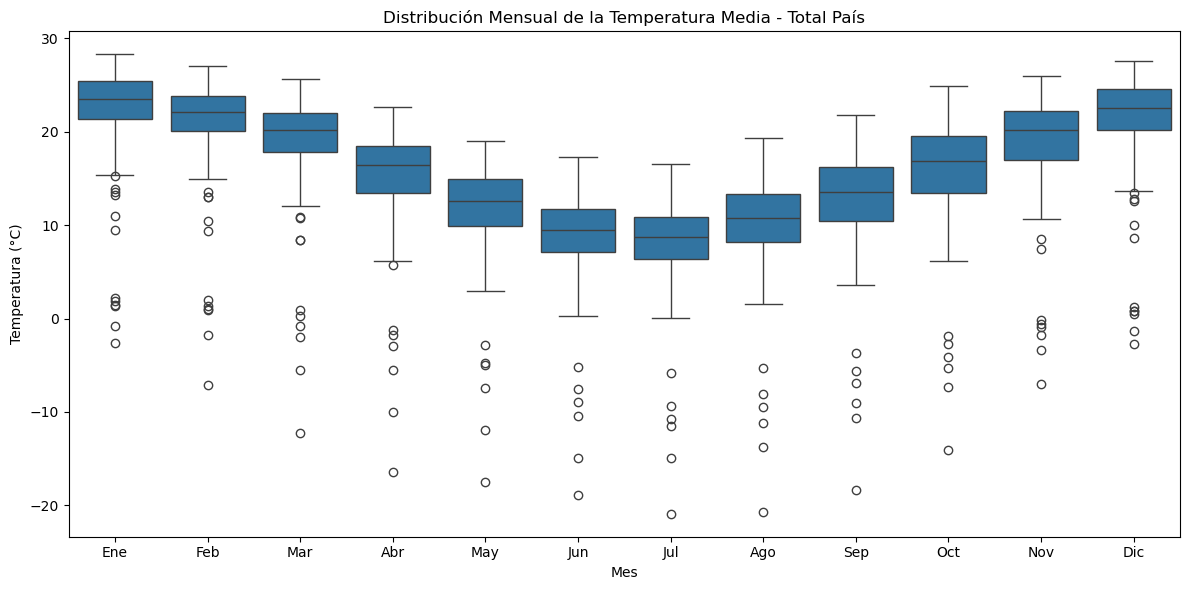

In [65]:
df_temp = df_corr[df_corr["Valor Medio de"] == "Temperatura (°C)"].copy()

columnas_meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
                  "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

for mes in columnas_meses:
    df_temp[mes] = pd.to_numeric(df_temp[mes], errors='coerce')

df_largo = df_temp.melt(
    id_vars=["Estación"],
    value_vars=columnas_meses,
    var_name="Mes",
    value_name="Temperatura"
)

orden_meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
               "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
df_largo["Mes"] = pd.Categorical(df_largo["Mes"], categories=orden_meses, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_largo, x="Mes", y="Temperatura")

plt.title("Distribución Mensual de la Temperatura Media - Total País")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.tight_layout()
plt.show()


**Como se puede ver, hay varios valores outliers en los distintos meses. Vamos a estudiar a que estaciones meteorológicas pertenecen.**

In [68]:
outliers_por_mes = {}

for mes in columnas_meses:
    
    Q1 = df_temp[mes].quantile(0.25)
    Q3 = df_temp[mes].quantile(0.75)
    IQR = Q3 - Q1 
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR    
    outliers = df_temp[(df_temp[mes] < limite_inferior) | (df_temp[mes] > limite_superior)]    
    if not outliers.empty:
        outliers_por_mes[mes] = outliers[['Estación', mes]]
        
for mes, datos in outliers_por_mes.items():
    print(f"Outliers en el mes de {mes}:")
    print(datos)
    print("\n")


Outliers en el mes de Ene:
                      Estación   Ene
0       LA QUIACA OBSERVATORIO  13.2
680  GOBERNADOR GREGORES AERO*  15.3
696          EL CALAFATE AERO*  13.9
712          RÍO GALLEGOS AERO  13.6
720            RÍO GRANDE B.A.  11.0
728              USHUAIA AERO*   9.5
736             BASE ESPERANZA   1.5
744               BASE ORCADAS   1.3
752           BASE BELGRANO II  -2.6
760   BASE CARLINI (EX JÚBANY)   2.2
768              BASE MARAMBIO  -0.8
776            BASE SAN MARTÍN   1.9


Outliers en el mes de Feb:
                     Estación   Feb
0      LA QUIACA OBSERVATORIO  13.0
696         EL CALAFATE AERO*  13.6
712         RÍO GALLEGOS AERO  13.0
720           RÍO GRANDE B.A.  10.4
728             USHUAIA AERO*   9.4
736            BASE ESPERANZA   0.9
744              BASE ORCADAS   1.4
752          BASE BELGRANO II  -7.1
760  BASE CARLINI (EX JÚBANY)   2.0
768             BASE MARAMBIO  -1.8
776           BASE SAN MARTÍN   1.0


Outliers en el mes de Mar:
  

**Listados de estaciones meteorológicas que presentan outliers**

In [71]:
estaciones_outliers = set()

for mes, datos in outliers_por_mes.items():
    estaciones_outliers.update(datos['Estación'])

lista_estaciones_outliers = sorted(estaciones_outliers)

print("Estaciones con valores atípicos en algún mes:")
for estacion in lista_estaciones_outliers:
    print(estacion)


Estaciones con valores atípicos en algún mes:
BARILOCHE AERO
BASE BELGRANO II
BASE CARLINI (EX JÚBANY)
BASE ESPERANZA
BASE MARAMBIO
BASE ORCADAS
BASE SAN MARTÍN
EL CALAFATE AERO*
GOBERNADOR GREGORES AERO*
LA QUIACA OBSERVATORIO
RÍO GALLEGOS AERO
RÍO GRANDE B.A.
USHUAIA AERO*


**Como se puede ver las estaciones corresponden a regiones del sur de nuestro país (Antártida o Patagonia) o montañosas.
Para poder estudiar mejor la distribución de estos valores, vamos a estudiarlo en el marco de las distintas regiones del país.**

### **Estudio de los valores atípicos (outliers). Evaluación de los valores de temperatura por región**

**Vamos a hacer una estudio de las variaciones de temperatura tomando en cuenta las regiones geográficas**

**Temperatura mensual por región**

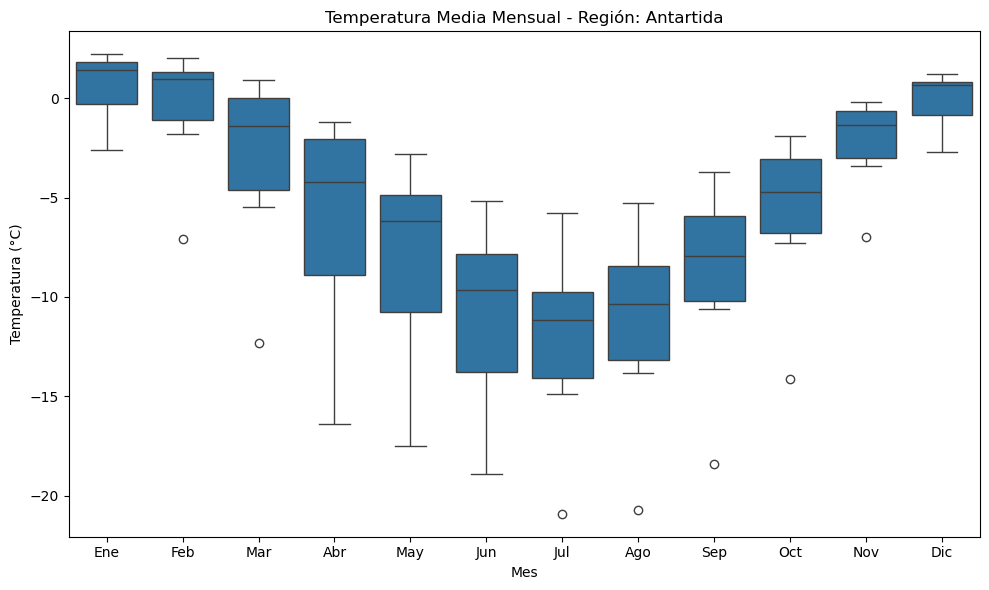

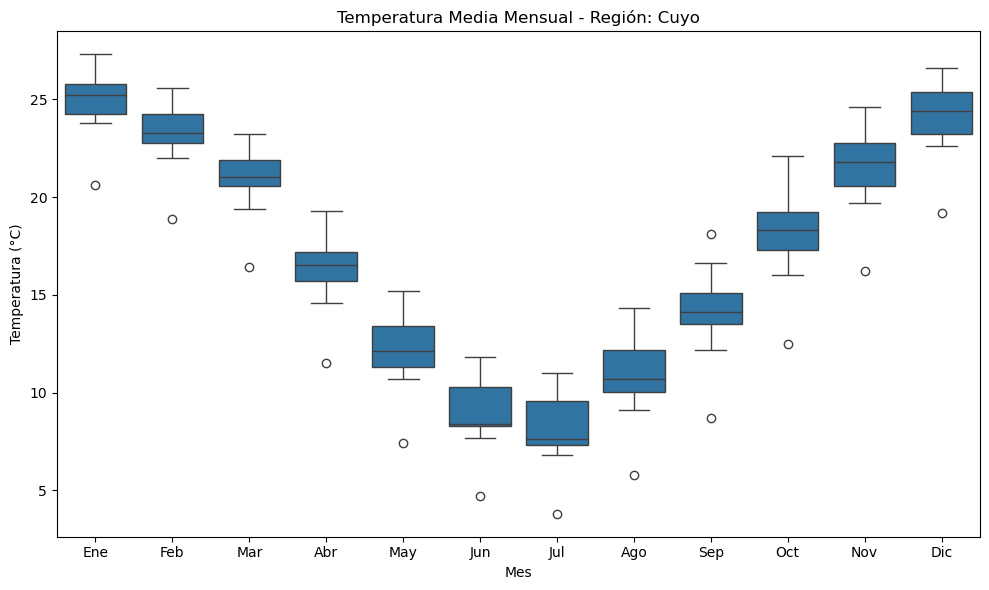

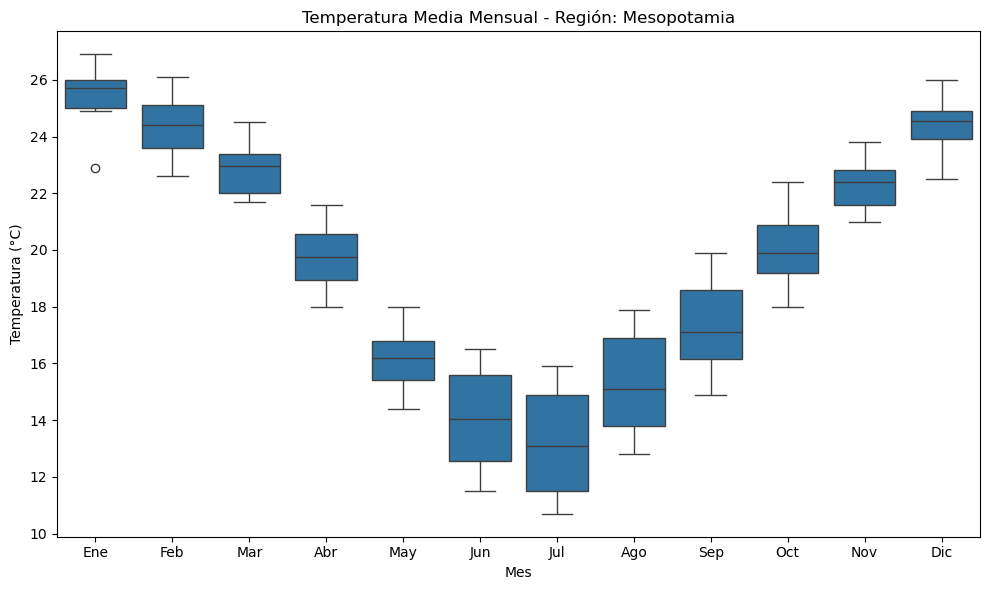

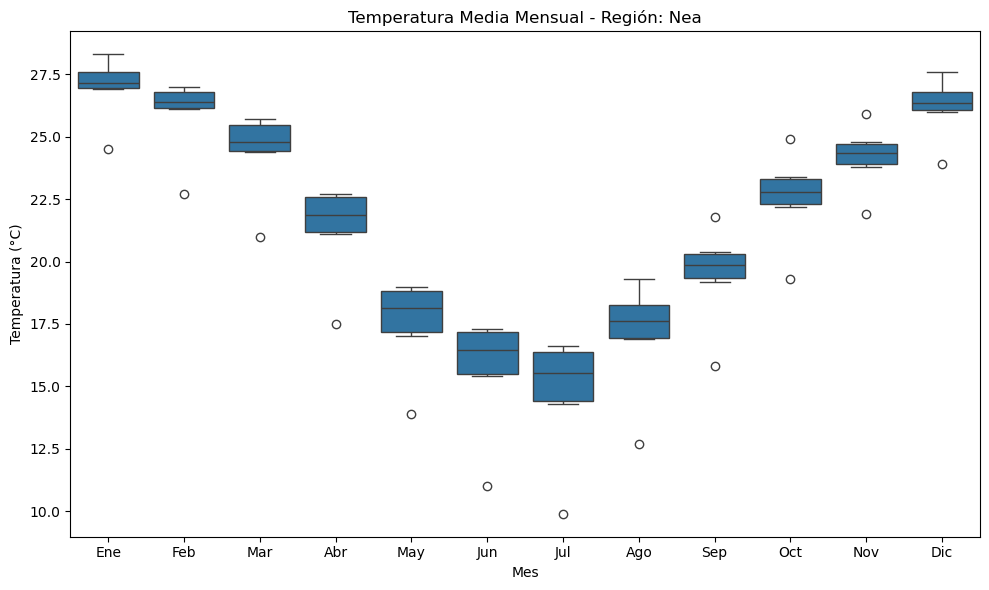

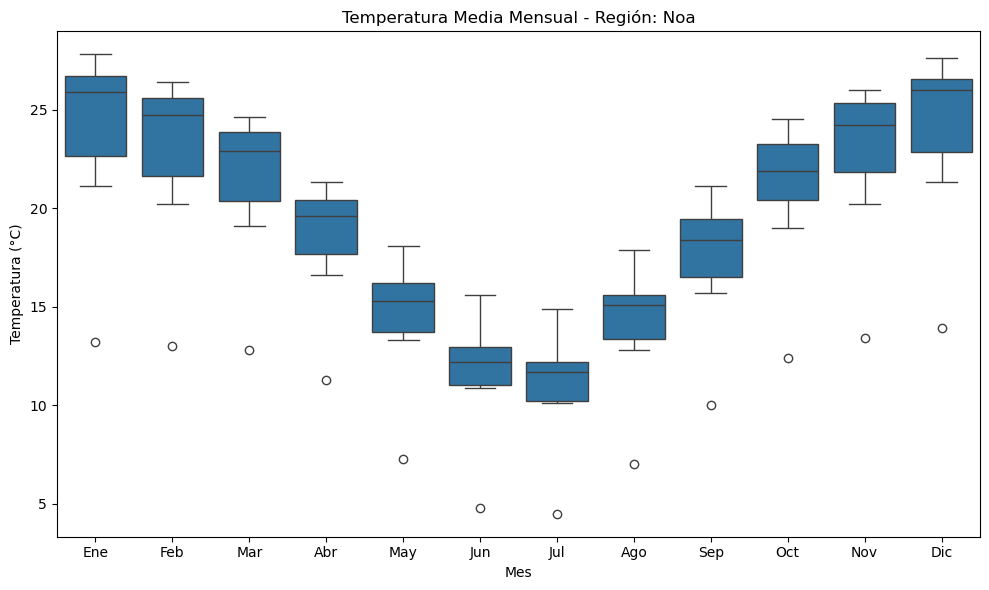

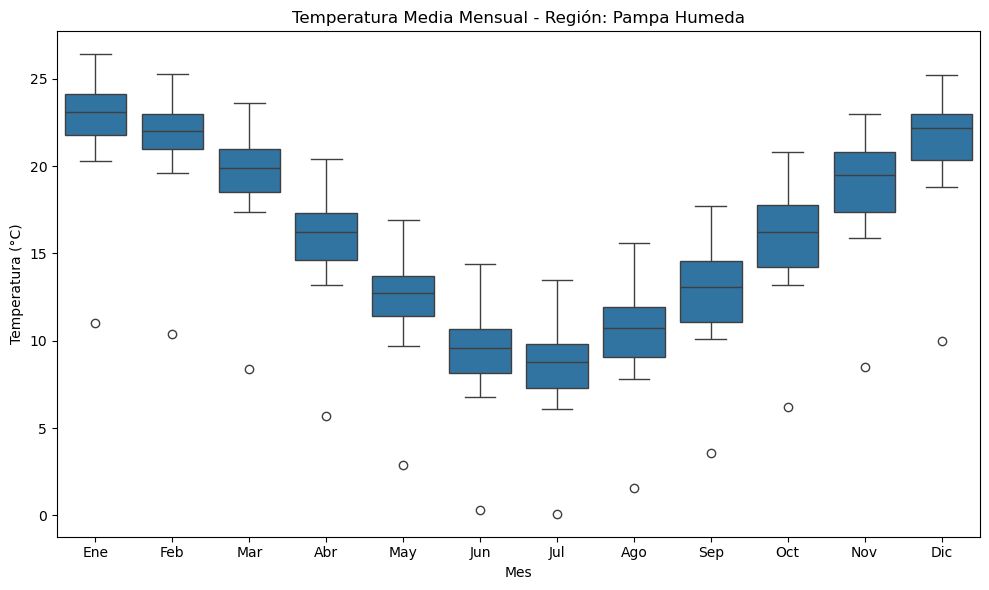

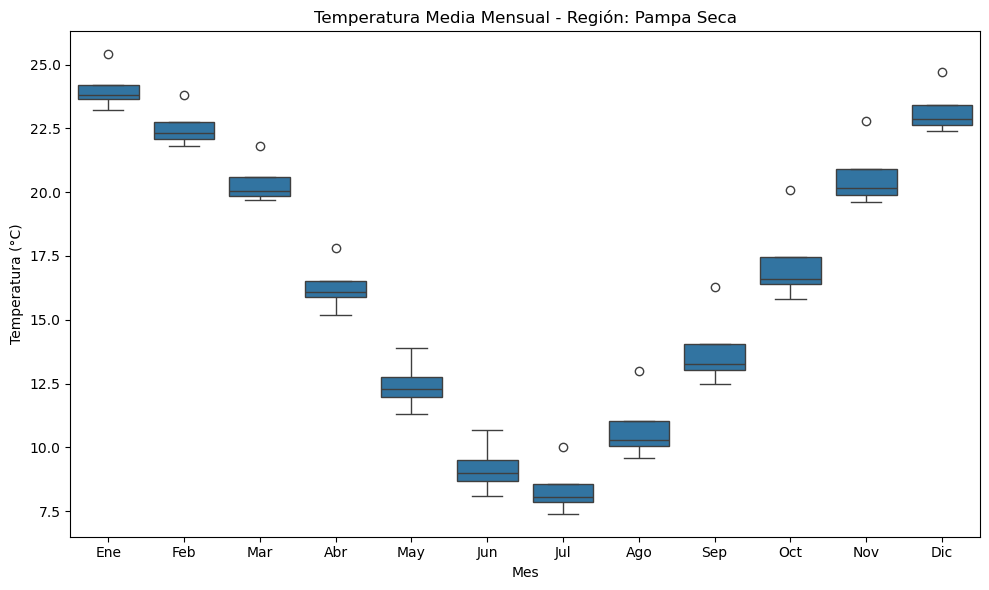

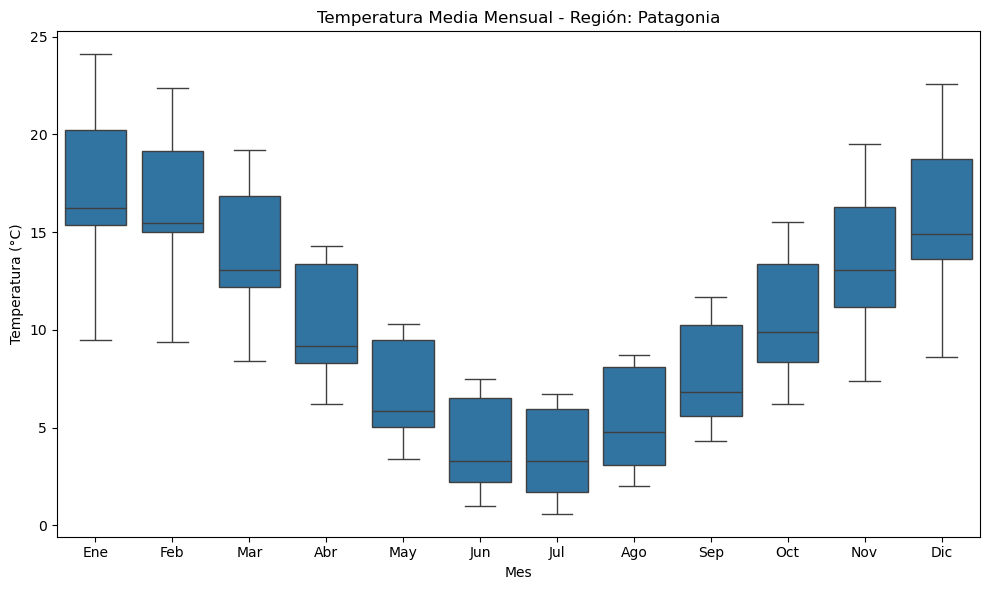

In [77]:
df_regiones = pd.read_csv("estaciones_por_region_actualizado.csv")

def normalizar_texto(txt):
    txt = str(txt).lower()
    txt = unicodedata.normalize("NFKD", txt)
    txt = "".join([c for c in txt if not unicodedata.combining(c)])  # quitar tildes
    txt = re.sub(r'[^a-z0-9 ]', '', txt)  # quitar *, ), etc.
    txt = txt.strip()
    return txt

df_corr["Estacion_norm"] = df_corr["Estación"].apply(normalizar_texto)
df_regiones["Estacion_norm"] = df_regiones["Estacion_norm"].apply(normalizar_texto)

df_regiones["Región"] = df_regiones["Región"].apply(normalizar_texto).str.title()

df_merge = pd.merge(df_corr, df_regiones[["Estacion_norm", "Región"]],
                    on="Estacion_norm", how="inner")

df_temp = df_merge[df_merge["Valor Medio de"] == "Temperatura (°C)"].copy()

for mes in columnas_meses:
    df_temp[mes] = pd.to_numeric(df_temp[mes], errors='coerce')


df_largo = df_temp.melt(
    id_vars=["Estación", "Región"],
    value_vars=columnas_meses,
    var_name="Mes",
    value_name="Temperatura"
)


orden_meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
               "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
df_largo["Mes"] = pd.Categorical(df_largo["Mes"], categories=orden_meses, ordered=True)

regiones = sorted(df_largo["Región"].unique())

for region in regiones:
    df_region = df_largo[df_largo["Región"] == region]

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_region, x="Mes", y="Temperatura")
    
    plt.title(f"Temperatura Media Mensual - Región: {region}")
    plt.xlabel("Mes")
    plt.ylabel("Temperatura (°C)")
    plt.tight_layout()
    plt.show()


## **a) Evolución mensual del promedio de temperaturas durante el perioro 1991-2020**

**i- Imputacion de datos faltantes temperaturas media, mínima y máxima**

In [80]:
df_regiones = pd.read_csv("estaciones_por_region_actualizado.csv")

def normalizar_texto(txt):
    txt = str(txt).lower()
    txt = unicodedata.normalize("NFKD", txt)
    txt = "".join([c for c in txt if not unicodedata.combining(c)])
    txt = re.sub(r'[^a-z0-9 ]', '', txt)
    return txt.strip()

# Normalización de estaciones y regiones
df_corr["Estacion_norm"] = df_corr["Estación"].apply(normalizar_texto)
df_regiones["Estacion_norm"] = df_regiones["Estacion_norm"].apply(normalizar_texto)
df_regiones["Región"] = df_regiones["Región"].apply(normalizar_texto).str.title()

# Merge para asociar región a cada estación
df_corr = pd.merge(df_corr, df_regiones[["Estacion_norm", "Región"]], on="Estacion_norm", how="left")

meses = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
         "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

for mes in meses:
    df_corr[mes] = pd.to_numeric(df_corr[mes], errors='coerce')

# Imputación de NaN con el promedio mensual por región
df_imputado = df_corr.copy()

variables_a_imputar = ["Temperatura (°C)", "Temperatura máxima (°C)", "Temperatura mínima (°C)"]

for variable in variables_a_imputar:
    for mes in meses:
        # Calcular promedio por región para ese mes y variable
        promedio = (
            df_corr[df_corr["Valor Medio de"] == variable]
            .groupby("Región")[mes]
            .mean()
        )
        # Buscar los índices donde hay NaN para ese mes y variable
        mask = (df_corr["Valor Medio de"] == variable) & (df_corr[mes].isna())
        # Imputar usando el promedio de su región
        df_imputado.loc[mask, mes] = df_corr.loc[mask, "Región"].map(promedio)

# --- Resultado: df_imputado tiene los NaN reemplazados ---
print("Valores de temperatura faltantes luego de imputar:")
print(df_imputado[df_imputado["Valor Medio de"].isin(variables_a_imputar)][meses].isna().sum())

#df_imputado.to_csv("df_imputado_temperaturas_promedio_region.csv", index=False)


Valores de temperatura faltantes luego de imputar:
Ene    0
Feb    0
Mar    0
Abr    0
May    0
Jun    0
Jul    0
Ago    0
Sep    0
Oct    0
Nov    0
Dic    0
dtype: int64


**ii- Grafico: evolución de la temperatura mensual promedio entre los años 1991 y 2020 (luego de la imputacion de valores faltantes)**

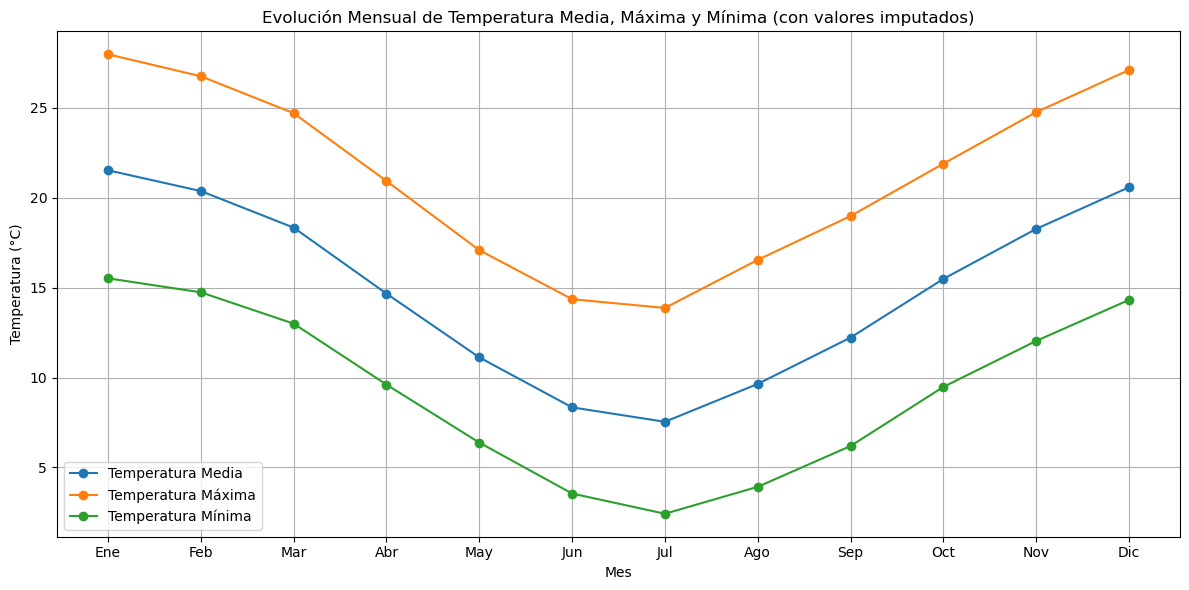

In [83]:
df_media = df_imputado[df_imputado["Valor Medio de"] == "Temperatura (°C)"]
df_max = df_imputado[df_imputado["Valor Medio de"] == "Temperatura máxima (°C)"]
df_min = df_imputado[df_imputado["Valor Medio de"] == "Temperatura mínima (°C)"]

# --- Calculo del promedio mensual para cada tipo de temperatura
prom_mensual_media = df_media[meses].mean()
prom_mensual_max = df_max[meses].mean()
prom_mensual_min = df_min[meses].mean()

meses_ordenados = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
                   "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

plt.figure(figsize=(12, 6))
plt.plot(meses_ordenados, prom_mensual_media[meses_ordenados], label="Temperatura Media", marker='o')
plt.plot(meses_ordenados, prom_mensual_max[meses_ordenados], label="Temperatura Máxima", marker='o')
plt.plot(meses_ordenados, prom_mensual_min[meses_ordenados], label="Temperatura Mínima", marker='o')

plt.title("Evolución Mensual de Temperatura Media, Máxima y Mínima (con valores imputados)")
plt.xlabel("Mes")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**ii- Grafico: evolución de la temperatura mensual promedio de cada región climática Argentina entre los años 1991 y 2020 (luego de la imputacion de valores faltantes)**

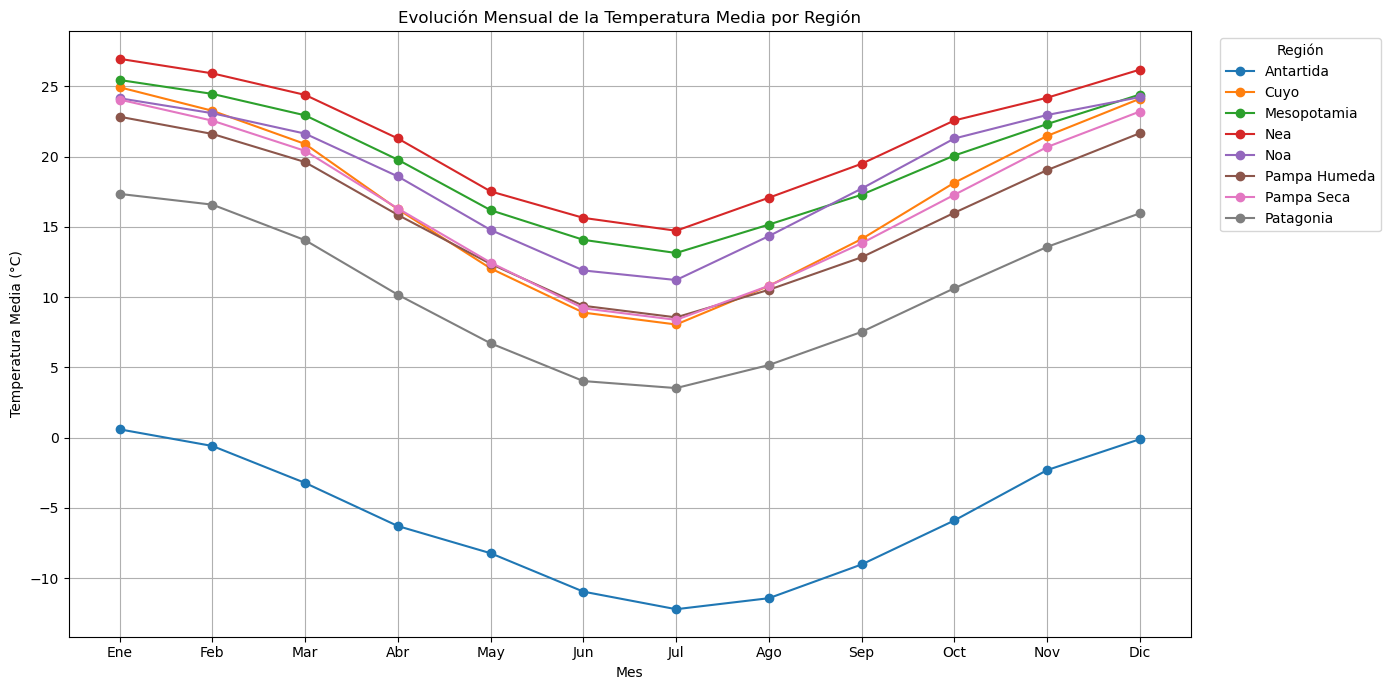

In [86]:
df_media = df_imputado[df_imputado["Valor Medio de"] == "Temperatura (°C)"].copy()

for mes in meses:
    df_media[mes] = pd.to_numeric(df_media[mes], errors="coerce")

promedio_por_region = df_media.groupby("Región")[meses].mean()

meses_ordenados = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", 
                   "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]

plt.figure(figsize=(14, 7))

for region in promedio_por_region.index:
    plt.plot(meses_ordenados, promedio_por_region.loc[region, meses_ordenados], label=region, marker='o')

plt.title("Evolución Mensual de la Temperatura Media por Región")
plt.xlabel("Mes")
plt.ylabel("Temperatura Media (°C)")
plt.legend(title="Región", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


## **b) Evolución mensual del promedio de valores de humedad relativa (%), nubosidad total (octavos), precipitaciones (mm) y frecuencia de días con precipitaciones mayores a 1 mm durante el perioro 1991-2020**

**i- Evaluación de los datos faltantes de nubosidad total y humedad relativa**

**Imputacion de los valores faltantes**

In [90]:
# Variables
variables_nh = ["Nubosidad total (octavos)", "Humedad relativa (%)"]

# Copia para imputar
df_imputado_nh = df_imputado.copy()

# Imputación con promedio anual por región ---
for variable in variables_nh:
    # Calculo del promedio anual por estación
    df_var = df_imputado_nh[df_imputado_nh["Valor Medio de"] == variable].copy()
    df_var["Promedio_Anual"] = df_var[meses].mean(axis=1)

    # Calculo del promedio anual por región
    promedio_anual_region = df_var.groupby("Región")["Promedio_Anual"].mean()

    # Imputación por mes usando ese promedio anual regional
    for mes in meses:
        mask = (df_imputado_nh["Valor Medio de"] == variable) & (df_imputado_nh[mes].isna())
        df_imputado_nh.loc[mask, mes] = df_imputado_nh.loc[mask, "Región"].map(promedio_anual_region)

# Imputación con promedio anual nacional (si no se pudo imputar por mes y por región)
for variable in variables_nh:
    df_var = df_imputado_nh[df_imputado_nh["Valor Medio de"] == variable].copy()
    df_var["Promedio_Anual"] = df_var[meses].mean(axis=1)
    promedio_anual_nacional = df_var["Promedio_Anual"].mean()

    for mes in meses:
        mask = (df_imputado_nh["Valor Medio de"] == variable) & (df_imputado_nh[mes].isna())
        df_imputado_nh.loc[mask, mes] = promedio_anual_nacional

# Verificación
faltantes_finales = df_imputado_nh[df_imputado_nh["Valor Medio de"].isin(variables_nh)][meses].isna().sum()
print("Valores faltantes luego de imputar Nubosidad y Humedad:")
print(faltantes_finales)

#df_imputado_nh.to_csv("df_imputado_temperaturas_hum_nubosidad.csv", index=False)

Valores faltantes luego de imputar Nubosidad y Humedad:
Ene    0
Feb    0
Mar    0
Abr    0
May    0
Jun    0
Jul    0
Ago    0
Sep    0
Oct    0
Nov    0
Dic    0
dtype: int64


**ii- Evaluación de los datos faltantes de precipitaciones (mm) y frecuencia de días con precipitaciones mayores a 1 mm**

**Imputación de los valores faltantes**

In [94]:
# Parámetros a imputar con KNN 
variables_objetivo = [
    "Precipitación (mm)",
    "Frecuencia de días con Precipitación superior a 1.0 mm"
]

variables_predictoras = [
    "Nubosidad total (octavos)",
    "Humedad relativa (%)"
]

# Imputación con KNN
df_knn = df_imputado_nh.copy()

for mes in meses:
    for region in df_knn["Región"].dropna().unique():
        df_mes_region = df_knn[df_knn["Región"] == region].copy()
        mask_vars = df_mes_region["Valor Medio de"].isin(variables_objetivo + variables_predictoras)
        df_sub = df_mes_region[mask_vars][["Estación", "Valor Medio de", mes]].copy()
        df_wide = df_sub.pivot(index="Estación", columns="Valor Medio de", values=mes)

        if df_wide[variables_objetivo].isna().all().all():
            continue

        imputer = KNNImputer(n_neighbors=7)
        df_imputed = pd.DataFrame(imputer.fit_transform(df_wide), columns=df_wide.columns, index=df_wide.index)

        df_long = df_imputed[variables_objetivo].reset_index().melt(id_vars="Estación", var_name="Valor Medio de", value_name=mes)

        for _, row in df_long.iterrows():
            mask = (df_knn["Estación"] == row["Estación"]) & (df_knn["Valor Medio de"] == row["Valor Medio de"])
            df_knn.loc[mask, mes] = row[mes]

# Imputación con promedio anual por región (si no imputó con KNN)
df_completo_post_knn = df_knn.copy()

for variable in variables_objetivo:
    df_var = df_completo_post_knn[df_completo_post_knn["Valor Medio de"] == variable].copy()
    df_var["Promedio_Anual"] = df_var[meses].mean(axis=1)
    promedio_region = df_var.groupby("Región")["Promedio_Anual"].mean()

    for mes in meses:
        mask = (df_completo_post_knn["Valor Medio de"] == variable) & (df_completo_post_knn[mes].isna())
        df_completo_post_knn.loc[mask, mes] = df_completo_post_knn.loc[mask, "Región"].map(promedio_region)

# Imputación final (si no imputó con las estrategias anteriores)
for variable in variables_objetivo:
    df_var = df_completo_post_knn[df_completo_post_knn["Valor Medio de"] == variable].copy()
    df_var["Promedio_Anual"] = df_var[meses].mean(axis=1)
    promedio_nacional = df_var["Promedio_Anual"].mean()

    for mes in meses:
        mask = (df_completo_post_knn["Valor Medio de"] == variable) & (df_completo_post_knn[mes].isna())
        df_completo_post_knn.loc[mask, mes] = promedio_nacional

# Verificación
faltantes_finales = df_completo_post_knn[df_completo_post_knn["Valor Medio de"].isin(variables_objetivo)][meses].isna().sum()
print("Valores faltantes luego de imputación completa:\n", faltantes_finales)

#df_completo_post_knn.to_csv("df_imputacion_completa.csv", index=False)

Valores faltantes luego de imputación completa:
 Ene    0
Feb    0
Mar    0
Abr    0
May    0
Jun    0
Jul    0
Ago    0
Sep    0
Oct    0
Nov    0
Dic    0
dtype: int64


***iii- Grafico: evolución de la nubosidad total, humedad relativa, precipitaciones y promedio de días de precipitaciones mayores a 1 mm promedio entre los años 1991 y 2020 (luego de la imputacion de valores faltantes)**

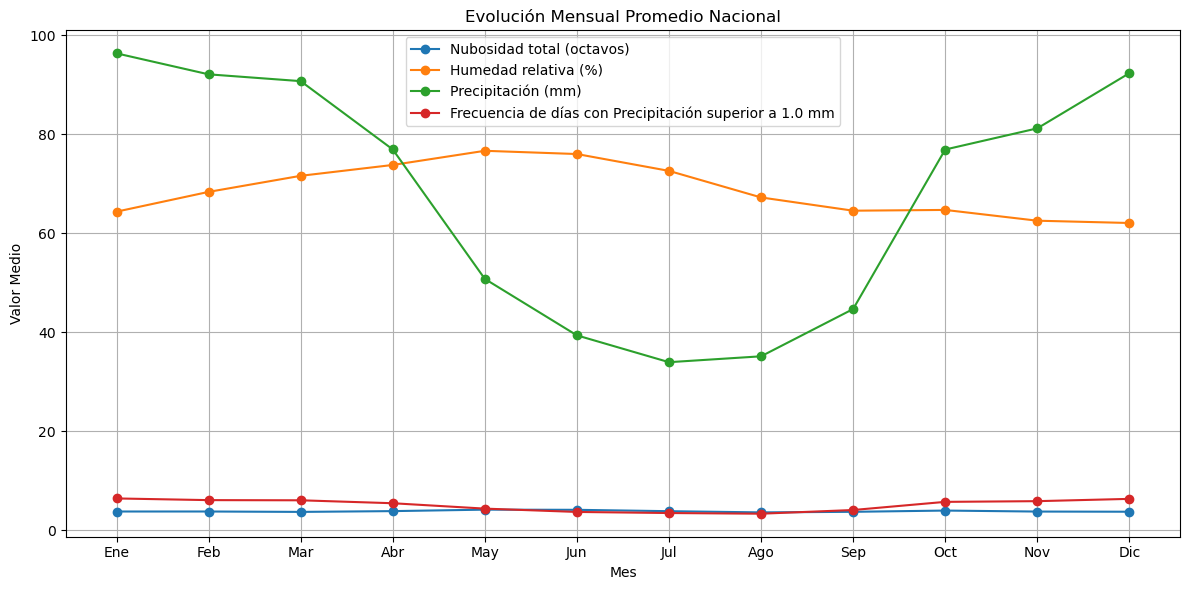

In [97]:
df_final = df_completo_post_knn

# Variables a graficar
variables_grafico = [
    "Nubosidad total (octavos)",
    "Humedad relativa (%)",
    "Precipitación (mm)",
    "Frecuencia de días con Precipitación superior a 1.0 mm"
]

promedios_mensuales = {}
for var in variables_grafico:
    df_var = df_final[df_final["Valor Medio de"] == var]
    promedios_mensuales[var] = df_var[meses].mean()

plt.figure(figsize=(12, 6))

for var in variables_grafico:
    plt.plot(meses, promedios_mensuales[var], label=var, marker='o')

plt.title("Evolución Mensual Promedio Nacional")
plt.xlabel("Mes")
plt.ylabel("Valor Medio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##**3) Análisis estadístico: correlación de la cantidad de precipitaciones (mm) con frecuencia de días con precipitacion superior a 1 mm**

Correlación de Pearson: r = 0.848 (p = 3.524e-28)
Correlación de Spearman: ρ = 0.845 (p = 6.953e-28)


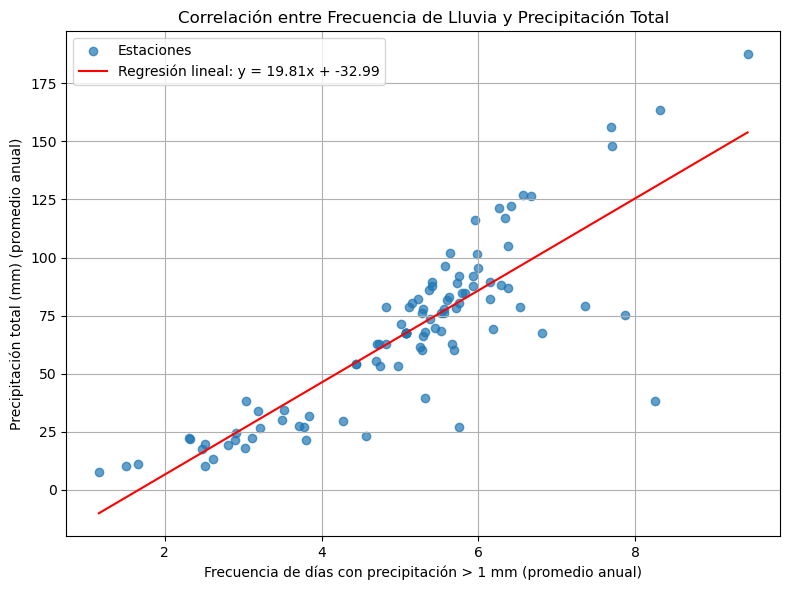

In [100]:
df_prec = df_final[df_final["Valor Medio de"] == "Precipitación (mm)"].copy()
df_freq = df_final[df_final["Valor Medio de"] == "Frecuencia de días con Precipitación superior a 1.0 mm"].copy()

# Ordenamos por estación
df_prec = df_prec.sort_values("Estación").reset_index(drop=True)
df_freq = df_freq.sort_values("Estación").reset_index(drop=True)

# Promedio anual por estación
prec_anual = df_prec[meses].mean(axis=1)
freq_anual = df_freq[meses].mean(axis=1)

# Correlación
pearson_corr, pearson_p = pearsonr(prec_anual, freq_anual)
spearman_corr, spearman_p = spearmanr(prec_anual, freq_anual)

print(f"Correlación de Pearson: r = {pearson_corr:.3f} (p = {pearson_p:.3e})")
print(f"Correlación de Spearman: ρ = {spearman_corr:.3f} (p = {spearman_p:.3e})")

# Línea de regresión lineal
m, b = np.polyfit(freq_anual, prec_anual, 1)
x_vals = np.linspace(freq_anual.min(), freq_anual.max(), 100)
y_vals = m * x_vals + b

plt.figure(figsize=(8, 6))
plt.scatter(freq_anual, prec_anual, alpha=0.7, label="Estaciones")
plt.plot(x_vals, y_vals, color='red', label=f"Regresión lineal: y = {m:.2f}x + {b:.2f}")
plt.title("Correlación entre Frecuencia de Lluvia y Precipitación Total")
plt.xlabel("Frecuencia de días con precipitación > 1 mm (promedio anual)")
plt.ylabel("Precipitación total (mm) (promedio anual)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **4) Reducción de la dimensionalidad**

Estudiamos la reducción de la dimensionalidad a través del uso de Análisis de los Componenetes Principales (PCA) tomando como parámetros de referencia:
- Temperatura
- Humedad relativa
- Nubosidad total
- Precipitación
- Frecuencia de días con precipitación

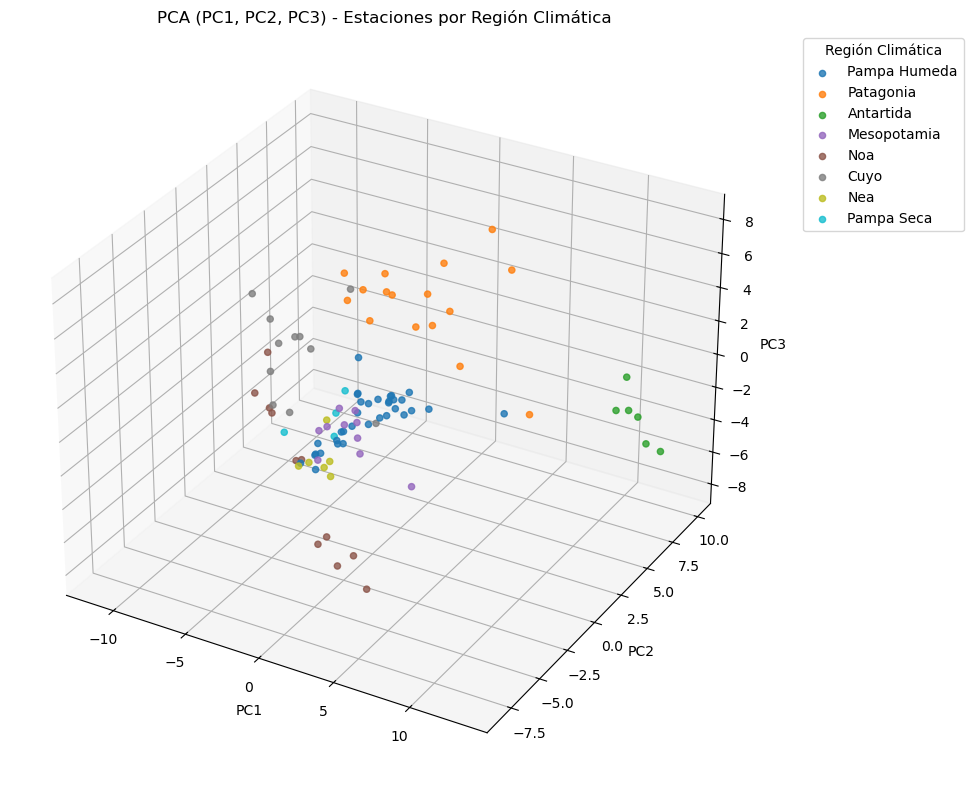

In [104]:
variables_pca = [
    "Temperatura (°C)",
    "Humedad relativa (%)",
    "Nubosidad total (octavos)",
    "Precipitación (mm)",
    "Frecuencia de días con Precipitación superior a 1.0 mm"
]

# Transformamos a formato largo y luego ancho
df_pca = df_final[df_final["Valor Medio de"].isin(variables_pca)].copy()
df_largo = df_pca.melt(id_vars=["Estación", "Valor Medio de"], value_vars=meses,
                       var_name="Mes", value_name="Valor")
df_largo["Var_Mes"] = df_largo["Valor Medio de"] + "_" + df_largo["Mes"]
df_ancho = df_largo.pivot(index="Estación", columns="Var_Mes", values="Valor")

# Estandarizarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ancho)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Asociamos regiones
df_estaciones = df_final[["Estación", "Región"]].drop_duplicates().set_index("Estación")
df_estaciones = df_estaciones.loc[df_ancho.index]  # asegurar mismo orden que df_ancho

# Gráfico 3D coloreado por región
regiones = df_estaciones["Región"].unique()
colores = plt.colormaps.get_cmap('tab10').resampled(len(regiones))
color_dict = {region: colores(i) for i, region in enumerate(regiones)}

pc1, pc2, pc3 = X_pca[:, 0], X_pca[:, 1], X_pca[:, 2]

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

for region in regiones:
    idx = df_estaciones["Región"] == region
    ax.scatter(pc1[idx], pc2[idx], pc3[idx], label=region, alpha=0.8, color=color_dict[region])

ax.set_title("PCA (PC1, PC2, PC3) - Estaciones por Región Climática")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(title="Región Climática", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
